## **Produtos mais Impactados pelo Dólar**

#### Este notebook apresenta a correlação entre a cotação do dólar e a inflação dos produtos e compõe o IPC-A, a fim de identificar quais são os produtos mais impactados pela diferença cambial

In [1]:
from DadosAbertosBrasil import ibge, ipea, favoritos
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Obter cotação do dólar

In [2]:
# Capturar câmbio
dolar = favoritos.cambio('USD', data_inicial='01-01-2015', data_final='01-01-2020')
dolar.head(10)

,Data,USD
0,2015-01-02 13:09:00.008,2.6929
1,2015-01-05 13:05:39.045,2.7107
2,2015-01-06 13:02:40.508,2.7023
3,2015-01-07 13:03:26.355,2.6807
4,2015-01-08 13:14:50.913,2.6919
5,2015-01-09 13:05:35.298,2.6583
6,2015-01-12 13:08:28.690,2.6575
7,2015-01-13 13:03:36.247,2.6485
8,2015-01-14 13:11:33.125,2.6222
9,2015-01-15 13:09:30.875,2.6122


In [3]:
# Formatar datas
dolar['mês'] = dolar.Data.dt.month
dolar['ano'] = dolar.Data.dt.year
dolar.head(10)

,Data,USD,mês,ano
0,2015-01-02 13:09:00.008,2.6929,1,2015
1,2015-01-05 13:05:39.045,2.7107,1,2015
2,2015-01-06 13:02:40.508,2.7023,1,2015
3,2015-01-07 13:03:26.355,2.6807,1,2015
4,2015-01-08 13:14:50.913,2.6919,1,2015
5,2015-01-09 13:05:35.298,2.6583,1,2015
6,2015-01-12 13:08:28.690,2.6575,1,2015
7,2015-01-13 13:03:36.247,2.6485,1,2015
8,2015-01-14 13:11:33.125,2.6222,1,2015
9,2015-01-15 13:09:30.875,2.6122,1,2015


In [4]:
# Obter última cotação do mês
dolar = dolar.groupby(['ano', 'mês']).last().reset_index().drop(columns=['ano', 'mês'])

# Obter variação percentual da cotação
dolar.USD = dolar.USD.pct_change()

dolar.head(10)

,Data,USD
0,2015-01-30 13:03:33.490,NaN
1,2015-02-27 13:16:10.395,0.081095
2,2015-03-31 13:03:36.780,0.114586
3,2015-04-30 13:09:01.536,-0.066833
4,2015-05-29 13:04:28.682,0.061865
5,2015-06-30 13:02:53.185,-0.023971
6,2015-07-31 13:09:26.023,0.093921
7,2015-08-31 13:10:45.736,0.074455
8,2015-09-30 13:03:13.098,0.089451
9,2015-10-30 13:03:37.247,-0.028694


#### 2. Obter índice IPCA-15 mensal

##### 2.1. Encontrar a tabela desejada

In [5]:
ibge.Agregados(index=True).filtrar(contendo='IPCA15')

,agregado_nome,pesquisa_id,pesquisa_nome
agregado_id,,,
1387,"IPCA15 - Variação mensal, acumulada no ano e p...",IQ,Índice Nacional de Preços ao Consumidor Amplo 15
1646,"IPCA15 - Variação mensal, acumulada no ano e p...",IQ,Índice Nacional de Preços ao Consumidor Amplo 15
1705,"IPCA15 - Variação mensal, acumulada no ano, ac...",IQ,Índice Nacional de Preços ao Consumidor Amplo 15
3065,"IPCA15 - Série histórica com número-índice, va...",IQ,Índice Nacional de Preços ao Consumidor Amplo 15
7062,"IPCA15 - Variação mensal, acumulada no ano, ac...",IQ,Índice Nacional de Preços ao Consumidor Amplo 15


In [6]:
meta = ibge.Metadados(1705)

##### 2.2. Definir períodos desejados

In [7]:
meta.periodos

{'frequencia': 'mensal', 'inicio': 201202, 'fim': 202001}

In [8]:
periodos = []
for i in range(2015, 2020):
    for j in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
        periodos.append(str(i)+j)

##### 2.3. Definir localidades desejadas

In [9]:
meta.localidades

{'Administrativo': ['N1', 'N6', 'N7'], 'Especial': [], 'IBGE': []}

In [10]:
localidades = {'N1': 'all'}

##### 2.4. Definir variáveis desejadas

In [11]:
meta.variaveis

[{'id': 355,
  'nome': 'IPCA15 - Variação mensal',
  'unidade': '%',
  'sumarizacao': []},
 {'id': 356,
  'nome': 'IPCA15 - Variação acumulada no ano',
  'unidade': '%',
  'sumarizacao': []},
 {'id': 1120,
  'nome': 'IPCA15 - Variação acumulada em 12 meses',
  'unidade': '%',
  'sumarizacao': []},
 {'id': 357,
  'nome': 'IPCA15 - Peso mensal',
  'unidade': '%',
  'sumarizacao': []}]

In [12]:
variavel = 355

##### 2.5. Definir classificações e categorias desejadas

In [13]:
meta.classificacoes

[{'id': 315,
  'nome': 'Geral, grupo, subgrupo, item e subitem',
  'sumarizacao': {'status': True, 'excecao': []},
  'categorias': [{'id': 7169,
    'nome': 'Índice geral',
    'unidade': None,
    'nivel': 0},
   {'id': 7170,
    'nome': '1.Alimentação e bebidas',
    'unidade': None,
    'nivel': 1},
   {'id': 7171,
    'nome': '11.Alimentação no domicílio',
    'unidade': None,
    'nivel': 2},
   {'id': 7172,
    'nome': '1101.Cereais, leguminosas e oleaginosas',
    'unidade': None,
    'nivel': 3},
   {'id': 7173, 'nome': '1101002.Arroz', 'unidade': None, 'nivel': 4},
   {'id': 7175,
    'nome': '1101051.Feijão - mulatinho',
    'unidade': None,
    'nivel': 4},
   {'id': 7176, 'nome': '1101052.Feijão - preto', 'unidade': None, 'nivel': 4},
   {'id': 7177,
    'nome': '1101053.Feijão - macassar (fradinho)',
    'unidade': None,
    'nivel': 4},
   {'id': 12222,
    'nome': '1101073.Feijão - carioca (rajado)',
    'unidade': None,
    'nivel': 4},
   {'id': 7184,
    'nome': '1102

In [14]:
# Aqui precisamos navegar pelo dictionaty de categorias para capturar uma lista de todas as ids
categorias = [cat['id'] for cat in meta.classificacoes[0]['categorias']]
classificacoes = {315: categorias}

##### 2.6. Criar objeto SIDRA

In [15]:
sidra = ibge.Sidra(agregado=1705, periodos=periodos, variaveis=variavel, classificacoes=classificacoes, localidades=localidades).rodar()

##### 2.7. Como extrair os valores do dictionary do SIDRA (usando farinha de arroz como exemplo)

In [16]:
# Extrair nome do item
list(sidra[0]['resultados'][10]['classificacoes'][0]['categoria'].values())[0]

'1102001.Farinha de arroz'

In [17]:
# Extrair IPCA15
pd.DataFrame(sidra[0]['resultados'][10]['series'][0]['serie'], index=['IPCA15']).T.head(10)

,IPCA15
201501,0.41
201502,2.92
201503,3.54
201504,1.97
201505,0.96
201506,-1.35
201507,0.24
201508,-0.15
201509,0.35
201510,-0.19


##### 2.8. Loop para capturar todos os itens

In [18]:
itens = [list(i['classificacoes'][0]['categoria'].values())[0] for i in sidra[0]['resultados']]
series = [pd.DataFrame(i['series'][0]['serie'], index=['IPCA15']).T for i in sidra[0]['resultados']]

#### 3. Formatar DataFrame de câmbio para que colunas coincidam

In [19]:
dolar.Data = dolar.Data.dt.strftime('%Y%m')
dolar.set_index('Data', inplace=True)
dolar.head(10)

,USD
Data,
201501,NaN
201502,0.081095
201503,0.114586
201504,-0.066833
201505,0.061865
201506,-0.023971
201507,0.093921
201508,0.074455
201509,0.089451


#### 4. Correlação

##### 4.1. Usar farinha de arroz como exemplo

In [20]:
# Criar DataFrame de comparação
df = pd.concat([series[10].IPCA15.astype(float)/100, dolar.USD], axis=1, sort=True)
df.head(10)

,IPCA15,USD
Data,,
201501,0.0041,NaN
201502,0.0292,0.081095
201503,0.0354,0.114586
201504,0.0197,-0.066833
201505,0.0096,0.061865
201506,-0.0135,-0.023971
201507,0.0024,0.093921
201508,-0.0015,0.074455
201509,0.0035,0.089451


In [21]:
# Cálculo de correlação
df.IPCA15.corr(df.USD)

0.05799510045760339

##### 4.2. Loop de correlação

In [22]:
correlacoes = []
for i, s in zip(itens, series):
    df = pd.concat([s.IPCA15.astype(float)/100, dolar.USD], axis=1)
    correlacoes.append([i, df.IPCA15.corr(df.USD)])

In [23]:
corr = pd.DataFrame(correlacoes, columns=['Itens', 'Correlação']).sort_values(by='Correlação')

In [24]:
# Maior correlação positiva com dólar
corr.tail(10)[::-1].reset_index(drop=True)

,Itens,Correlação
0,7201054.Boate e danceteria,0.400594
1,1115017.Pepino em conserva,0.332499
2,3101003.Móvel para quarto,0.325629
3,5104005.Gás veicular,0.306144
4,3102007.Utensílios de metal,0.305697
5,5102001.Automóvel novo,0.299492
6,2202003.Energia elétrica residencial,0.291527
7,2202.Energia elétrica residencial,0.291527
8,22.Combustíveis e energia,0.279110
9,1201048.Cerveja,0.274031


In [25]:
# Maior correlação negativa com dólar
corr.head(10).reset_index(drop=True)

,Itens,Correlação
0,1111031.Manteiga,-0.381820
1,4301004.Relógio de pulso,-0.360476
2,8103001.Caderno,-0.333106
3,5101010.Passagem aérea,-0.323886
4,1113040.Margarina,-0.297480
5,5102053.Motocicleta,-0.287096
6,1113.Óleos e gorduras,-0.284971
7,5101.Transporte público,-0.280602
8,4101009.Camisa/camiseta masculina,-0.268447
9,7203001.Máquina fotográfica,-0.264062


#### 5. Plottar os dois itens mais correlacionados

In [26]:
itens.index('7201054.Boate e danceteria')

401

In [27]:
itens.index('1111031.Manteiga')

121

In [28]:
df401 = pd.concat([series[401].IPCA15.astype(float)/100, dolar.USD], axis=1)
df121 = pd.concat([series[121].IPCA15.astype(float)/100, dolar.USD], axis=1)

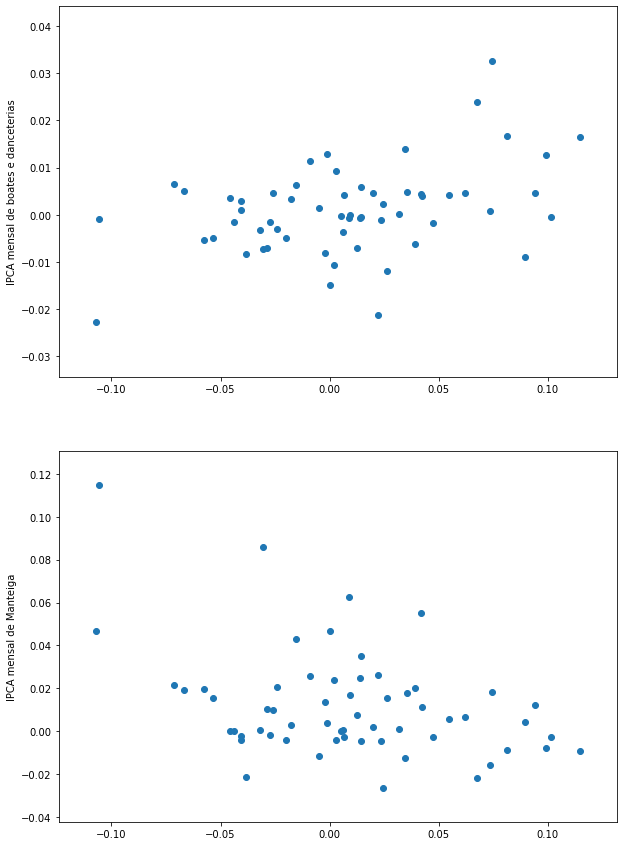

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(10,15))

# Boate
ax1 = plt.subplot(211)
plt.scatter(df401.USD, df401.IPCA15)
plt.ylabel('IPCA mensal de boates e danceterias')

# Manteiga
ax2 = plt.subplot(212, sharex=ax1)
plt.scatter(df121.USD, df121.IPCA15)
plt.ylabel('IPCA mensal de Manteiga')

plt.show()